In [37]:
from __future__ import print_function

%matplotlib inline
import matplotlib

import numpy as np
import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import os
import os.path as osp
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import pysptools.classification as cls
from spectral import *

import pysptools.material_count as cnt
import pysptools.spectro as spectro
import scipy
import scipy.io

# Define SAM

In [41]:
def SAM(data, E, thrs=None):
    sam = cls.SAM()
    cmap = sam.classify(data, E, threshold=thrs)
    sam.display(colorMap='Accent',suffix='AVIRIS-NG')
    return cmap

# Read the datasets and corresponding endmembers

In [30]:
r1_reg = scipy.io.loadmat('r1_reg.mat')
r1_reg = r1_reg['r1_reg']

mnf_den = scipy.io.loadmat('mnf_den.mat')
mnf_den = mnf_den['mnf_den']

pca_den = scipy.io.loadmat('pca_den.mat')
pca_den = pca_den['pca_den']

ica_den = scipy.io.loadmat('ica_den.mat')
ica_den = ica_den['ica_den']

rsvd_den = scipy.io.loadmat('rsvd_den.mat')
rsvd_den = rsvd_den['rsvd_den']

In [46]:
ori_nfindr = scipy.io.loadmat('ori_nfindr.mat')
ori_nfindr = ori_nfindr['ori_nfindr']

pcad_nfindr = scipy.io.loadmat('pcad_nfindr.mat')
pcad_nfindr = pcad_nfindr['pcad_nfindr']

mnfd_nfindr = scipy.io.loadmat('mnfd_nfindr.mat')
mnfd_nfindr = mnfd_nfindr['mnfd_nfindr']

icad_nfindr = scipy.io.loadmat('icad_nfindr.mat')
icad_nfindr = icad_nfindr['icad_nfindr']

rsvd_nfindr = scipy.io.loadmat('rsvd_nfindr.mat')
rsvd_nfindr = rsvd_nfindr['rsvd_nfindr']

# SAM Tests

In [47]:
on = np.zeros((7,372))
on[0,:] = ori_nfindr[6,:]
on[1,:] = ori_nfindr[2,:]
on[2,:] = ori_nfindr[1,:]
on[3,:] = ori_nfindr[0,:]
on[4,:] = ori_nfindr[4,:]
on[5,:] = ori_nfindr[3,:]
on[6,:] = ori_nfindr[5,:]

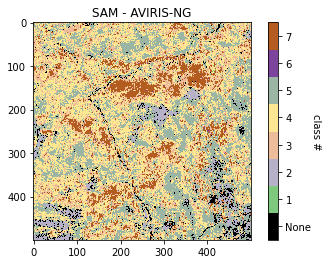

In [114]:
ori_sam = SAM(r1_reg, on, [0.4, 0.3, 0.37, 0.27, 0.1, 0.3, 0.2])

Text(0.5, 1.0, 'Original+SAM')

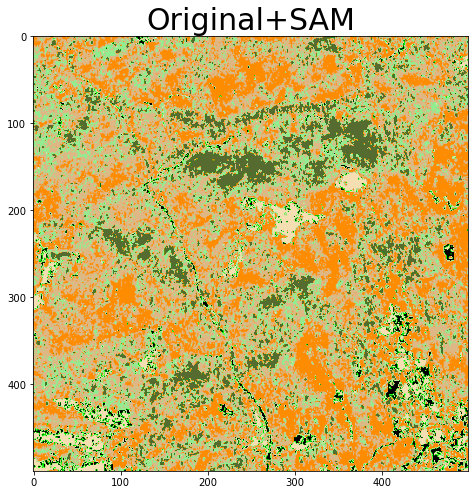

In [119]:
clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","lime","wheat","lightgreen",
                                                                 "burlywood","darkorange","forestgreen","darkolivegreen"])
plt.figure(figsize=(8,8))
plt.imshow(ori_sam,cmap = clmap)
plt.title('Original+SAM', fontsize = '30')
#plt.colorbar()

In [120]:
# rSVD
rn = np.zeros((7,372))
rn[0,:] = rsvd_nfindr[6,:]
rn[1,:] = rsvd_nfindr[2,:]
rn[2,:] = rsvd_nfindr[1,:]
rn[3,:] = rsvd_nfindr[0,:]
rn[4,:] = rsvd_nfindr[4,:]
rn[5,:] = rsvd_nfindr[3,:]
rn[6,:] = rsvd_nfindr[5,:]

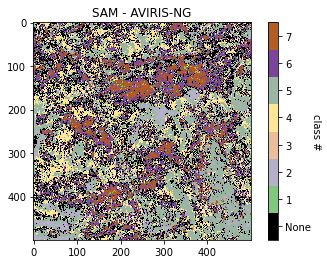

In [150]:
rsvd_sam = SAM(rsvd_den, rn, [0.4, 0.33, 0.33, 0.19, 0.17, 0.32, 0.11])

Text(0.5, 1.0, 'rSVD PCA+SAM')

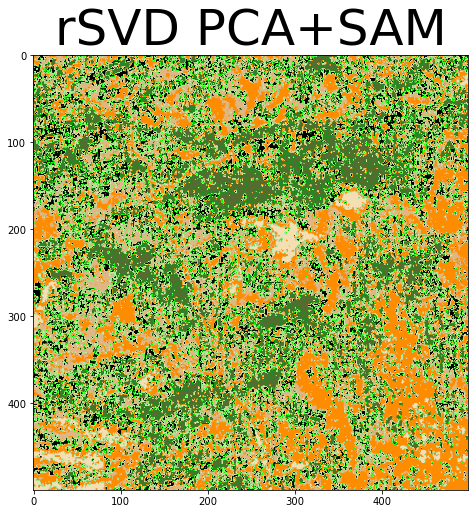

In [152]:
clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","lime","wheat","lightgreen",
                                                                 "burlywood","darkorange","forestgreen","darkolivegreen"])
plt.figure(figsize=(8,8))
plt.imshow(rsvd_sam,cmap = clmap)
plt.title('rSVD PCA+SAM', fontsize = '50')
#plt.colorbar()

In [153]:
# ICA
In = np.zeros((7,372))
In[0,:] = icad_nfindr[6,:]
In[1,:] = icad_nfindr[2,:]
In[2,:] = icad_nfindr[1,:]
In[3,:] = icad_nfindr[0,:]
In[4,:] = icad_nfindr[4,:]
In[5,:] = icad_nfindr[3,:]
In[6,:] = icad_nfindr[5,:]

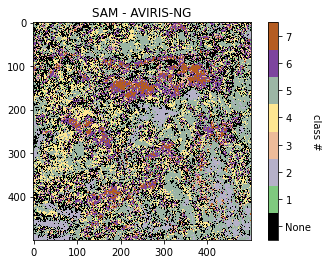

In [160]:
ica_sam = SAM(ica_den, In, [0.4, 0.33, 0.33, 0.19, 0.1, 0.32, 0.11])

Text(0.5, 1.0, 'ICA+SAM')

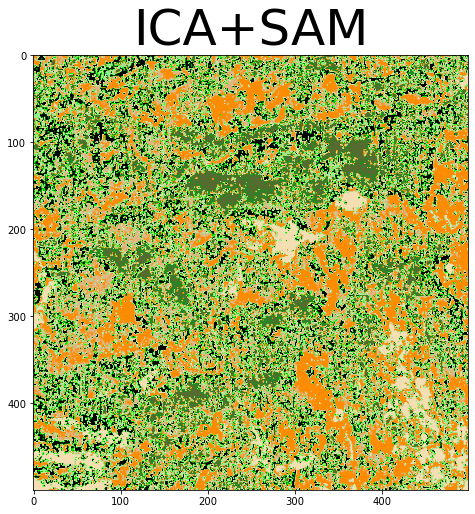

In [162]:
clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","lime","wheat","lightgreen",
                                                                 "burlywood","darkorange","forestgreen","darkolivegreen"])
plt.figure(figsize=(8,8))
plt.imshow(ica_sam,cmap = clmap)
plt.title('ICA+SAM', fontsize = '50')
#plt.colorbar()

# Define SID

In [167]:
def SID(data,E,thrs=None):
    sid = cls.SID()
    cmap = sid.classify(data,E,threshold=thrs)
    sid.display(colorMap='Accent',suffix='AVIRIS-NG')
    return cmap

# SID Tests

/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/classification/cls.py:186: RuntimeWarning: overflow encountered in log
  pp = p[i,:] * np.log(p[i,:] / q[0:,:])
/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/classification/cls.py:185: RuntimeWarning: overflow encountered in log
  pq = q[0:,:] * np.log(q[0:,:] / p[i,:])


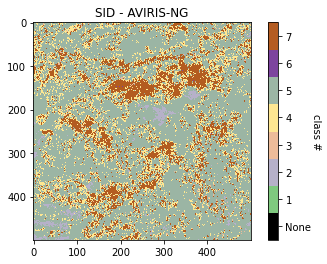

In [168]:
ori_sid = SID(r1_reg, on, [0.4, 0.3, 0.37, 0.27, 0.1, 0.3, 0.2])

Text(0.5, 1.0, 'Original+SID')

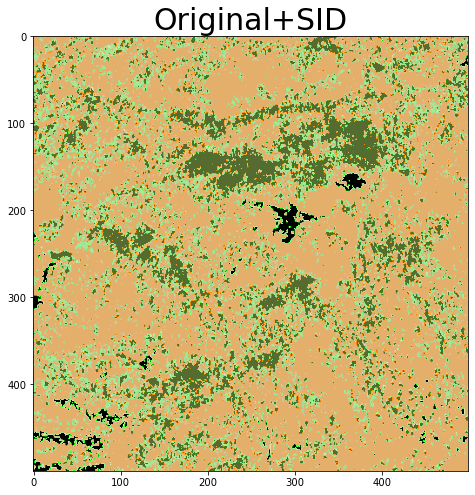

In [169]:
clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","lime","wheat","lightgreen",
                                                                 "burlywood","darkorange","forestgreen","darkolivegreen"])
plt.figure(figsize=(8,8))
plt.imshow(ori_sid,cmap = clmap)
plt.title('Original+SID', fontsize = '30')
#plt.colorbar()

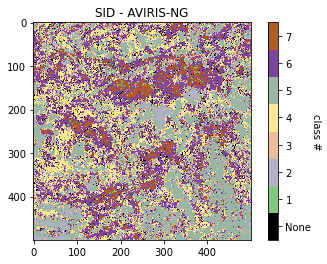

In [238]:
rsvd_sid = SID(rsvd_den, rn, [0.15,0.25,0.3,0.05,0.05,0.2,0.03])

Text(0.5, 1.0, 'rSVD PCA+SID')

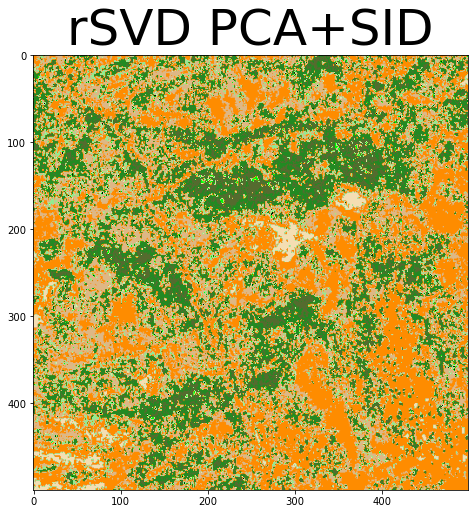

In [239]:
clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","lime","wheat","lightgreen",
                                                                 "burlywood","darkorange","forestgreen","darkolivegreen"])
plt.figure(figsize=(8,8))
plt.imshow(rsvd_sid,cmap = clmap)
plt.title('rSVD PCA+SID', fontsize = '50')
#plt.colorbar()

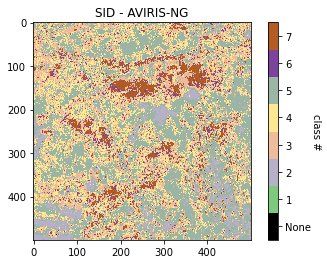

In [242]:
ica_sid = SID(ica_den, In, [0.15,0.25,0.27,0.12,0.04,0.27,0.05])

Text(0.5, 1.0, 'ICA+SID')

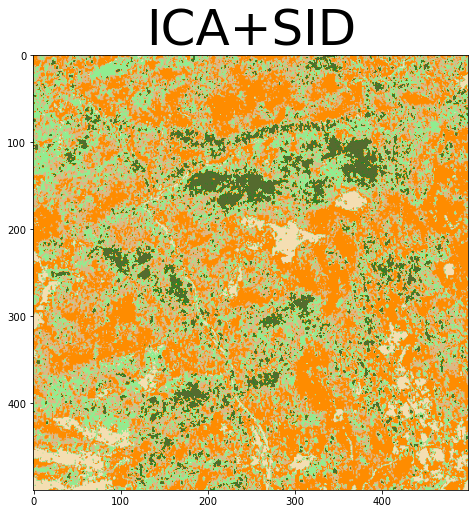

In [244]:
clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","lime","wheat","lightgreen",
                                                                 "burlywood","darkorange","forestgreen","darkolivegreen"])
plt.figure(figsize=(8,8))
plt.imshow(ica_sid,cmap = clmap)
plt.title('ICA+SID', fontsize = '50')
# plt.colorbar()